# Extraindo Tweets com Python | Análise de Sentimento

In [1]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Abrir o arquivo
dfTwitter = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/arquivo_extracao.csv")


In [6]:
#ordenar por id
dfTwitter.sort_values(by=['id'], ascending=False)

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted
0,Tue Jun 15 23:19:58 +0000 2021,1404941785302974465,1404941785302974465,"A cobra pode trocar de pele, mas o veneno cont...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 870826277355343873, 'id_str': '87082627...",NaN,NaN,NaN,NaN,False,0,0,False,False
1,Tue Jun 15 23:19:58 +0000 2021,1404941784355160064,1404941784355160064,RT @felipeneto: O decreto que Jair Bolsonaro q...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,NaN,"{'id': 306502103, 'id_str': '306502103', 'name...",NaN,NaN,NaN,NaN,False,434,0,False,False
2,Tue Jun 15 23:19:58 +0000 2021,1404941782631305217,1404941782631305217,RT @muylaerte: Kalil já sinalizou que não apoi...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 47960274, 'id_str': '47960274', 'name':...",NaN,NaN,NaN,NaN,False,24,0,False,False
3,Tue Jun 15 23:19:58 +0000 2021,1404941782014644224,1404941782014644224,RT @pnplstorm: Motociata contra Bolsonaro no E...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,NaN,"{'id': 789694173460963328, 'id_str': '78969417...",NaN,NaN,NaN,NaN,False,1952,0,False,False
4,Tue Jun 15 23:19:57 +0000 2021,1404941780370575367,1404941780370575367,RT @RubensOtoni: 🔴🦠💉AGORA É TARDE-Depois de re...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,NaN,"{'id': 1058088575592525824, 'id_str': '1058088...",NaN,NaN,NaN,NaN,False,50,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Tue Jun 15 23:19:30 +0000 2021,1404941666809696257,1404941666809696257,"RT @laderechadiario: 🇧🇷🇮🇱 | Jair Bolsonaro: ""A...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,NaN,"{'id': 144305170, 'id_str': '144305170', 'name...",NaN,NaN,NaN,NaN,False,114,0,False,False
96,Tue Jun 15 23:19:30 +0000 2021,1404941665714982914,1404941665714982914,RT @EnockFormiga: MITO!\nBolsonaro é um gênio ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,NaN,"{'id': 1382848295475757056, 'id_str': '1382848...",NaN,NaN,NaN,NaN,False,1047,0,False,False
97,Tue Jun 15 23:19:30 +0000 2021,1404941665421467648,1404941665421467648,@Conservadora191 Esse cara está preocupado com...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.404817e+18,1.404817e+18,1.250416e+18,1.250416e+18,Conservadora191,"{'id': 1256745019458965506, 'id_str': '1256745...",NaN,NaN,NaN,NaN,False,0,0,False,False
98,Tue Jun 15 23:19:29 +0000 2021,1404941664075010053,1404941664075010053,RT @MidiaNINJA: Recorde mundial de fake news!\...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,NaN,"{'id': 266743730, 'id_str': '266743730', 'name...",NaN,NaN,NaN,NaN,

In [7]:
import csv
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
#realiza a tokenização
dfTwitter['tokenized_text'] = dfTwitter.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [9]:
#realiza a separação das stopwords
stopwords = nltk.corpus.stopwords.words('portuguese')

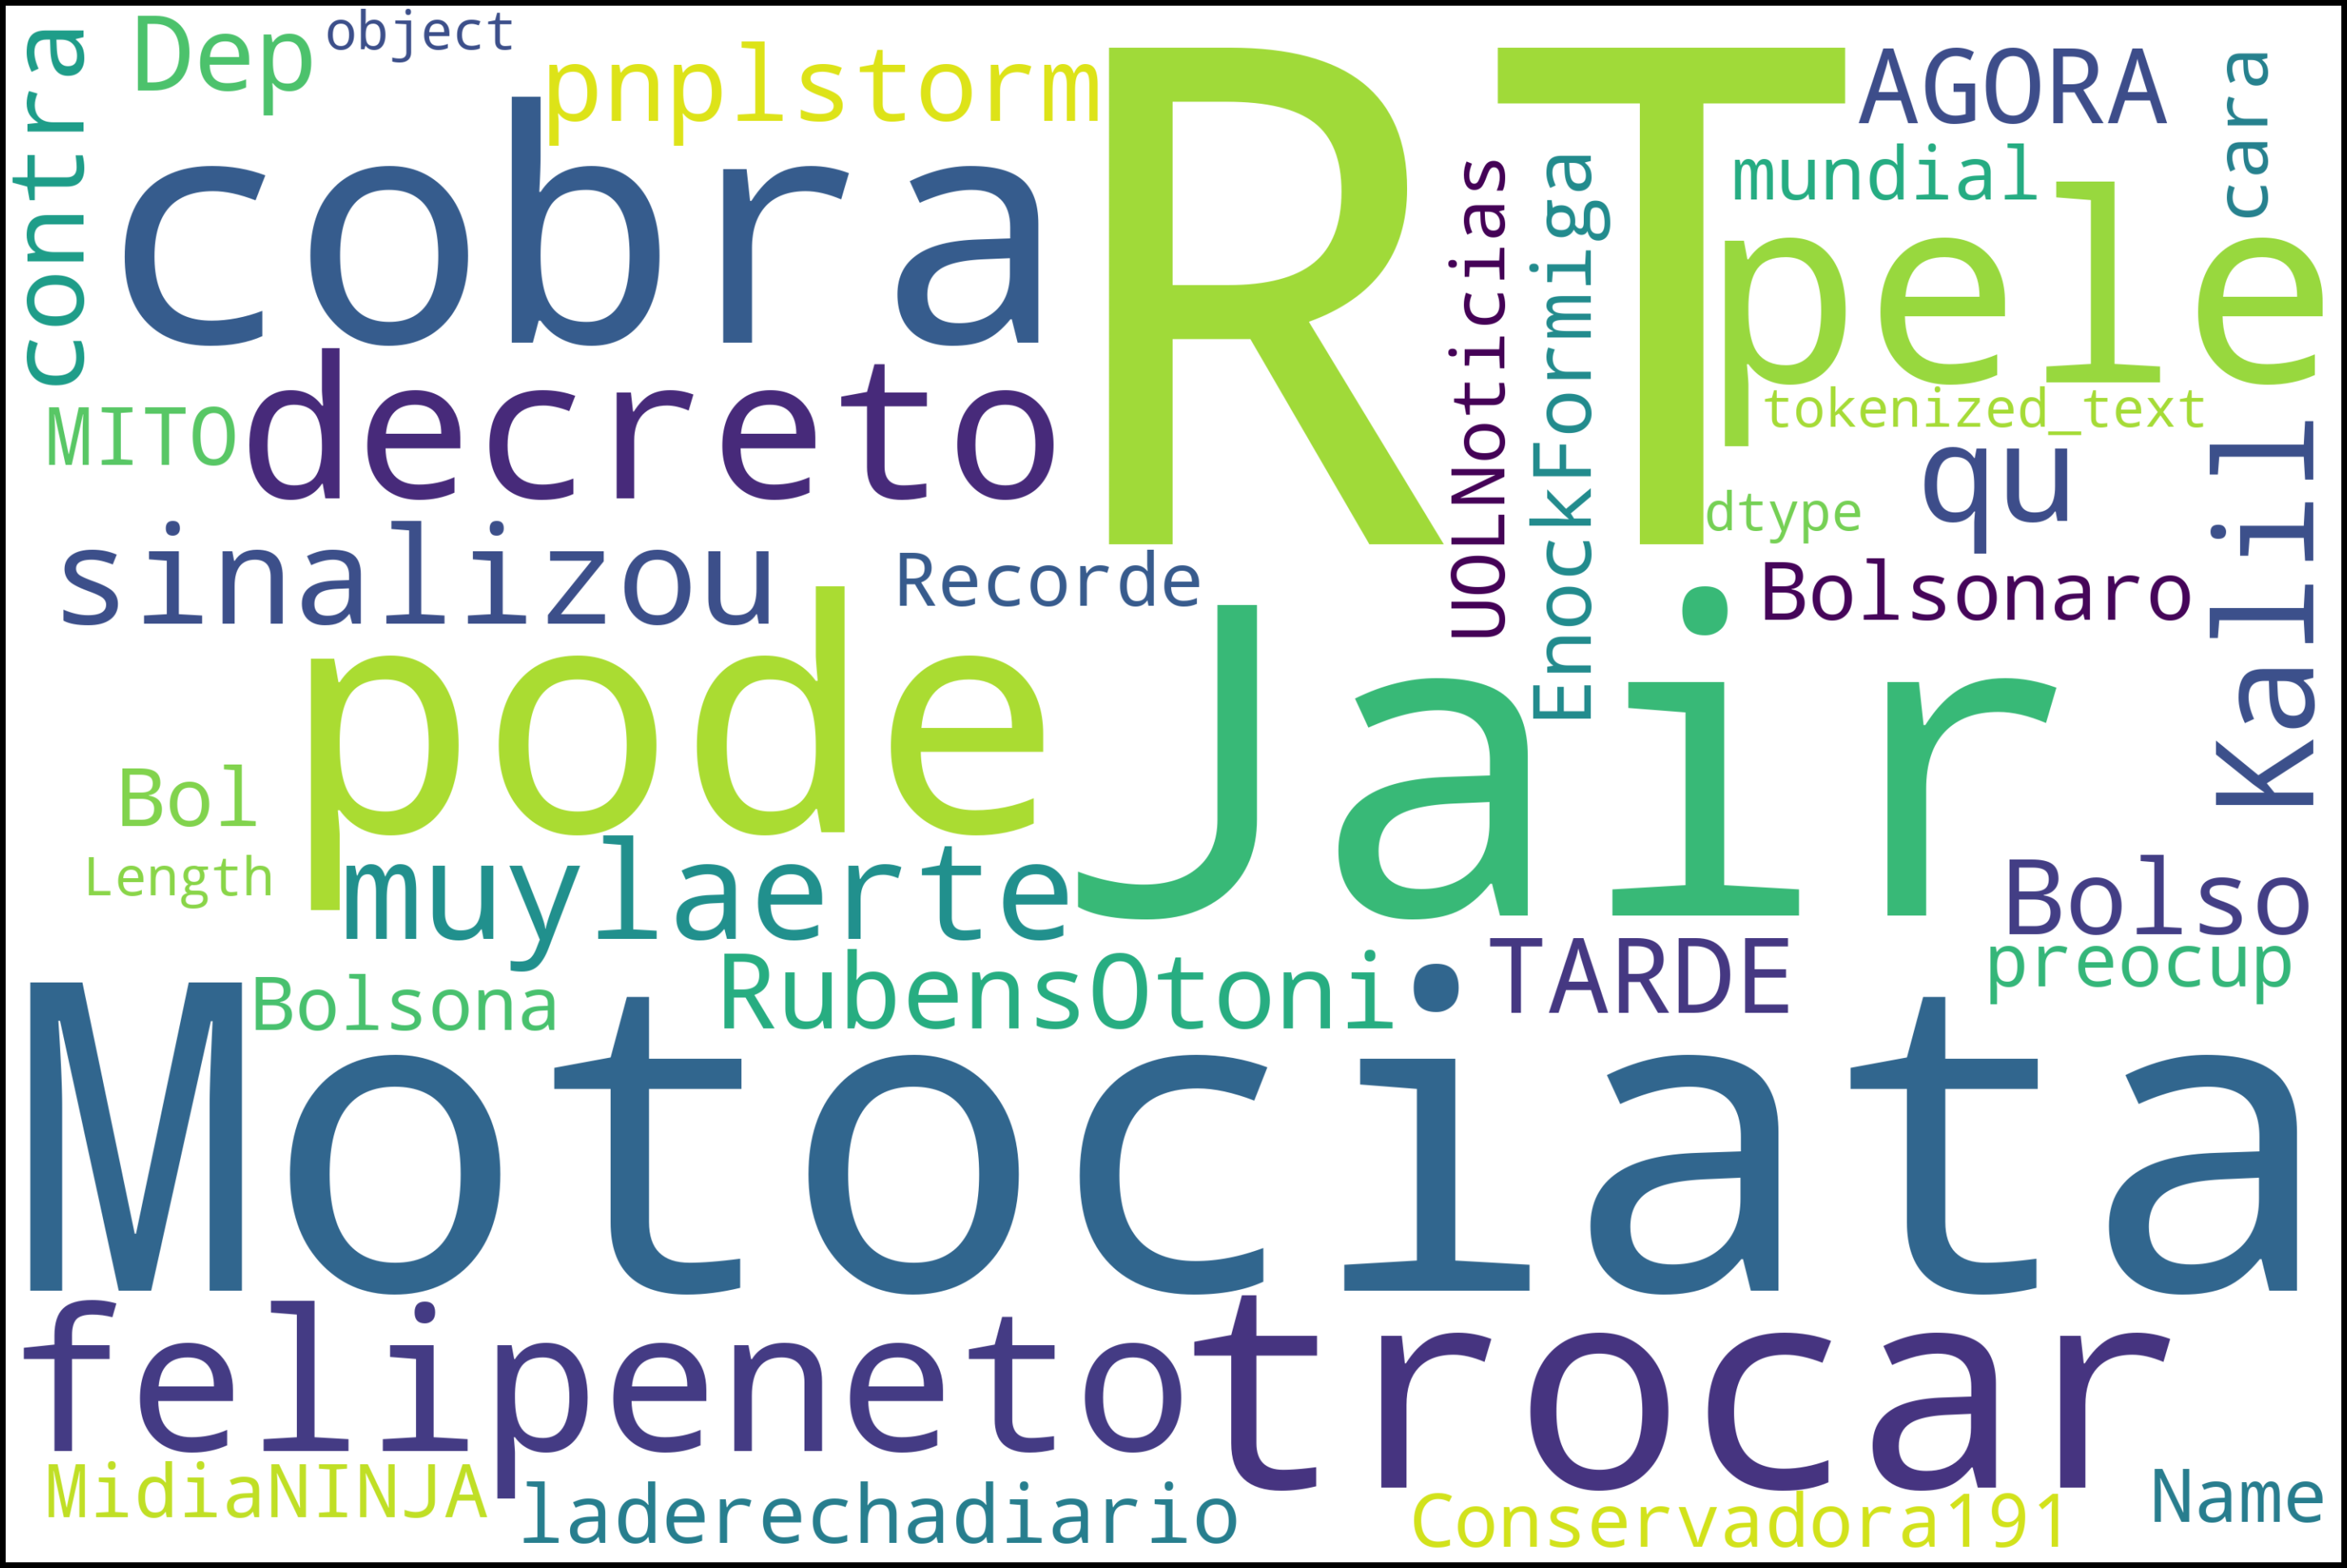

In [10]:
#cria a visualização de nuvem de palavras
text = dfTwitter.tokenized_text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords=stopwords).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [22]:
print(wordcloud.words_)

{'RT': 1.0, 'Jair': 0.25, 'Motociata': 0.25, 'cobra': 0.125, 'pode': 0.125, 'trocar': 0.125, 'pele': 0.125, 'felipeneto': 0.125, 'decreto': 0.125, 'muylaerte': 0.125, 'Kalil': 0.125, 'sinalizou': 0.125, 'qu': 0.125, 'pnplstorm': 0.125, 'contra': 0.125, 'Bolso': 0.125, 'RubensOtoni': 0.125, 'AGORA': 0.125, 'TARDE': 0.125, 'Dep': 0.125, 'laderechadiario': 0.125, 'Bol': 0.125, 'EnockFormiga': 0.125, 'MITO': 0.125, 'Bolsonaro': 0.125, 'Conservadora191': 0.125, 'cara': 0.125, 'preocup': 0.125, 'MidiaNINJA': 0.125, 'Recorde': 0.125, 'mundial': 0.125, 'UOLNoticias': 0.125, 'Bolsona': 0.125, 'Name': 0.125, 'tokenized_text': 0.125, 'Length': 0.125, 'dtype': 0.125, 'object': 0.125}


In [11]:
#Importando o Léxico de Palavras com polaridades
sentilexpt = open('/content/drive/MyDrive/Colab Notebooks/SentiLex-flex-PT01.txt')

#Criando um dicionário de palavras com a respectiva polaridade.
dic_palavra_polaridade = {}
for i in sentilexpt.readlines():
  pos_ponto = i.find('.')
  palavra = (i[:pos_ponto])
  pol_pos = i.find('POL')
  polaridade = (i[pol_pos+7:pol_pos+9]).replace(';', '')
  dic_palavra_polaridade[palavra] = polaridade


#Verificando o dicionário

dic_palavra_polaridade


{'\ufeffabafada,abafado': 'AN',
 'abafadas,abafado': 'AN',
 'abafado,abafado': 'AN',
 'abafados,abafado': 'AN',
 'abafante,abafante': 'AN',
 'abafantes,abafante': 'AN',
 'abaixada,abaixado': 'AN',
 'abaixadas,abaixado': 'AN',
 'abaixado,abaixado': 'AN',
 'abaixados,abaixado': 'AN',
 'abalada,abalado': 'AN',
 'abaladas,abalado': 'AN',
 'abalado,abalado': 'AN',
 'abalados,abalado': 'AN',
 'abalizada,abalizado': 'NO',
 'abalizadas,abalizado': 'NO',
 'abalizado,abalizado': 'NO',
 'abalizados,abalizado': 'NO',
 'abandalhada,abandalhado': 'AN',
 'abandalhadas,abandalhado': 'AN',
 'abandalhado,abandalhado': 'AN',
 'abandalhados,abandalhado': 'AN',
 'abandonada,abandonado': 'AN',
 'abandonadas,abandonado': 'AN',
 'abandonado,abandonado': 'AN',
 'abandonados,abandonado': 'AN',
 'abarcante,abarcante': 'AN',
 'abarcantes,abarcante': 'AN',
 'abarrotada,abarrotado': 'AN',
 'abarrotadas,abarrotado': 'AN',
 'abarrotado,abarrotado': 'AN',
 'abarrotados,abarrotado': 'AN',
 'abastada,abastado': 'NO',
 '

In [12]:
print(text)

0     [A, cobra, pode, trocar, de, pele, ,, mas, o, ...
1     [RT, @, felipeneto, :, O, decreto, que, Jair, ...
2     [RT, @, muylaerte, :, Kalil, já, sinalizou, qu...
3     [RT, @, pnplstorm, :, Motociata, contra, Bolso...
4     [RT, @, RubensOtoni, :, 🔴🦠💉AGORA, É, TARDE-Dep...
                            ...                        
95    [RT, @, laderechadiario, :, 🇧🇷🇮🇱, |, Jair, Bol...
96    [RT, @, EnockFormiga, :, MITO, !, Bolsonaro, é...
97    [@, Conservadora191, Esse, cara, está, preocup...
98    [RT, @, MidiaNINJA, :, Recorde, mundial, de, f...
99    [RT, @, UOLNoticias, :, Motociata, de, Bolsona...
Name: tokenized_text, Length: 100, dtype: object


In [14]:
print(dic_palavra_polaridade.get('felipeneto'))

None


In [15]:
def Score_sentimento(frase):
    frase = frase.lower()
    l_sentimento = []
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_polaridade.get(p, 0)))
    score = sum(l_sentimento)
    if score > 0:
        return 'Positivo, Score:{}'.format(score)
    elif score == 0:
        return 'Neutro, Score:{}'.format(score)
    else:
        return 'Negativo, Score:{}'.format(score)

In [16]:
Score_sentimento('abominável')

'Neutro, Score:0'